# Variações de uma arara.

## Autor: [Hamid Naderi Yeganeh](https://en.wikipedia.org/wiki/Hamid_Naderi_Yeganeh)

## https://www.huffpost.com/entry/mathematical-birds_b_8876904

In [1]:
#Importamos as bibliotecas e módulos que vamos usar.
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import cm

%matplotlib inline

#Módulo para fazer animações
import matplotlib.animation as animation

#Função para visualizar dados 
from IPython.display import Latex, Math, HTML

# Tamanho da fonte
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100 

In [2]:
# Arranjo com a grade de cores

#cores = cm.rainbow(np.linspace(0,1,10001))
cores = cm.rainbow(np.square(np.linspace(0,1,10001)))

In [3]:
# Coordenadas dos centros dos círculos

def A(k):
    return (3 * k / 20000) + (np.cos(37 * (np.pi) * k / 10000)) ** 6 * np.sin((k / 10000) ** 7 * (3 * np.pi / 5)) + \
           (9 / 7) * (np.cos(37 * np.pi * k / 10000)) ** 16 * (np.cos(np.pi * k / 20000)) ** 12 * np.sin(
        np.pi * k / 10000)


def B(k):
    return (-5 / 4) * (np.cos(37 * np.pi * k / 10000)) ** 6 * np.cos((k / 10000) ** 7 * (3 * np.pi / 5)) * \
           (1 + 3 * (np.cos(np.pi * k / 20000) * np.cos(3 * np.pi * k / 20000)) ** 8) + \
           (2 / 3) * (np.cos(3 * np.pi * k / 200000) * np.cos(9 * np.pi * k / 200000) * np.cos(
        9 * np.pi * k / 100000)) ** 12

In [4]:
# Raio dos círculos

def R(k):
    return (1 / 32) + (1 / 15) * (np.sin(37 * np.pi * k / 10000)) ** 2 * ((np.sin(np.pi * k / 10000)) ** 2 + \
                                                                          (3 / 2) * (np.cos(np.pi * k / 20000)) ** 18)

In [5]:
# Centros dos círculos e raios para os gráficos

kvalues = np.linspace(-10000, 10000, 20001)
xvalues = A(kvalues)
yvalues = B(kvalues)
rvalues = R(kvalues)

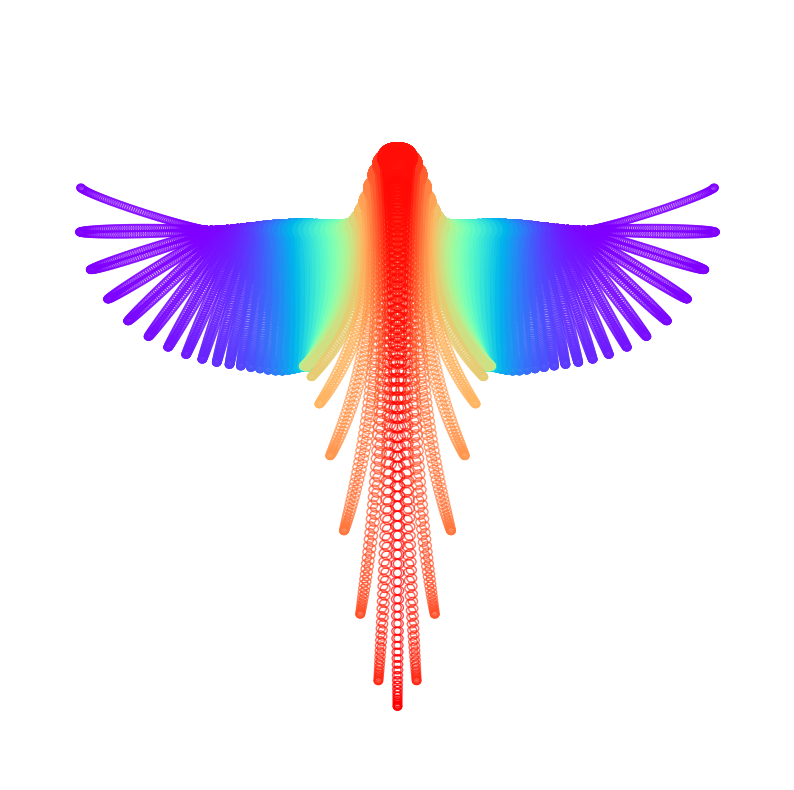

In [7]:
# Imagem da arara

fig, ax = plt.subplots(figsize=(10.0, 10.0))

# limites em x e y

ax.set_xlim(-3, 3)
ax.set_ylim(-5, 2)

# geração dos círculos coloridos
for k in range(0,10001):
    #Parte esquerda da arara
    circle = plt.Circle((xvalues[k], yvalues[k]), rvalues[k], color = cores[k], alpha = 0.7, fill = False, lw = 1)
    ax.add_patch(circle)
    #Parte direita da arara
    circle = plt.Circle((xvalues[20000-k], yvalues[20000-k]), rvalues[20000-k], color = cores[k], 
                        alpha = 0.7, fill = False, lw = 1)    
    ax.add_patch(circle)
    
# esconder os eixos e o fundo

fig.patch.set_visible(False)
ax.axis('off')

# mostrar a imagem

plt.show()

In [8]:
# Animação da arara

fig, ax = plt.subplots(figsize=(6.0, 7.0), dpi=200)

# limites em x e y

ax.set_xlim(-3, 3)
ax.set_ylim(-5, 2)

# esconder os eixos e o fundo

fig.patch.set_visible(False)
ax.axis('off')

def init():
    # initialize an empty list of cirlces
    return []

#Atualização do gráfico
#Círculos da arara
def update(passo):
    patches = []
    for k in range(0,10001, passo):
        #Parte esquerda da arara
        circle = plt.Circle((xvalues[k], yvalues[k]), rvalues[k], color = cores[k], alpha = 0.7, fill = False, lw = 1)
        patches.append(ax.add_patch(circle))
        #Parte direita da arara
        circle = plt.Circle((xvalues[20000-k], yvalues[20000-k]), rvalues[20000-k], color = cores[k], 
                        alpha = 0.7, fill = False, lw = 1)    
        patches.append(ax.add_patch(circle))
    return patches

#ani é uma instância da classe FuncAnimation
ani = animation.FuncAnimation(fig, update, init_func=init, 
                              frames = [10000, 5000, 4000, 2000, 1000, 
                                        500, 400, 200, 100, 
                                        50, 40, 20, 10, 
                                        5, 4, 2, 1],
                    blit=True, interval = 300)

#Não queremos mostrar a figura
plt.close()
#Mostrar a animação
#ani
ani.save("arara_colorida.mp4", writer="ffmpeg")    